<a href="https://colab.research.google.com/github/illusoryTwin/FoR/blob/plotting_assig1/assig1/FundamentalsOfRobotics_Assig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Forward Kinematics
##  Antropomorphic elbow with a spherical wrist

## Elbow
![Image](https://drive.google.com/uc?export=view&id=17zG41RTwz8amP0VphfeS9KIdjZVnPH_0)


## Spherical wrist
![Image](https://drive.google.com/uc?export=view&id=1NzAcCwKtdXwueeBZS20bo7Jra0075qQn)


## Manipulator
![Image](https://drive.google.com/uc?export=view&id=1YTnHb9JNJHb5IChMIZxDhtwBxIIelD-w)


# Transformation matrices

The  rotation matrices are defined as follows:

$$R_x(\theta)=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & \cos(\theta) & -\sin(\theta) & 0 \\
    0 & \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

$$R_y(\theta)=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & \cos(\theta) & -\sin(\theta) & 0 \\
    0 & \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

$$R_z(\theta)=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & \cos(\theta) & -\sin(\theta) & 0 \\
    0 & \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

The translation matrices are defined as follows:

$$T_x(dx)=
\begin{bmatrix}
    1 & 0 & 0 & dx \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

$$T_y(dy)=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & dy \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

$$T_z(dz)=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & dz \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

In [103]:
import numpy as np
import sympy as sp

def rotate_x(theta):
    cos_theta = sp.cos(theta)
    sin_theta = sp.sin(theta)
    rot_matrix_x = sp.Matrix([[1, 0, 0, 0],
                              [0, cos_theta, -sin_theta, 0],
                              [0, sin_theta, cos_theta, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_x

def rotate_y(theta):
    cos_theta = sp.cos(theta)
    sin_theta = sp.sin(theta)
    rot_matrix_y = sp.Matrix([[cos_theta, 0, sin_theta, 0],
                              [0, 1, 0, 0],
                              [-sin_theta, 0, cos_theta, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_y

def rotate_z(theta):
    cos_theta = sp.cos(theta)
    sin_theta = sp.sin(theta)
    rot_matrix_z = sp.Matrix([[cos_theta, -sin_theta, 0, 0],
                              [sin_theta, cos_theta, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_z

def translate_x(dx):
    translation_matrix_x = sp.Matrix([[1, 0, 0, dx],
                                      [0, 1, 0, 0],
                                      [0, 0, 1, 0],
                                      [0, 0, 0, 1]])
    return translation_matrix_x

def translate_y(dy):
    translation_matrix_y = sp.Matrix([[1, 0, 0, 0],
                                      [0, 1, 0, dy],
                                      [0, 0, 1, 0],
                                      [0, 0, 0, 1]])
    return translation_matrix_y

def translate_z(dz):
    translation_matrix_z = sp.Matrix([[1, 0, 0, 0],
                                      [0, 1, 0, 0],
                                      [0, 0, 1, dz],
                                      [0, 0, 0, 1]])
    return translation_matrix_z


# Forward Kinematics

There are two approaches for solving forward kinematics problem:

## (1)
For this manipulator, consisting of an anthropomorphic arm with a spherical wrist,
the direct kinematics problem cannot be obtained by pure multiplication of transformation matrices ${}^0T_3$ and ${}^3T_6$ since
the elbow needs to coincide with the spherical wrist.
We need to transform from the final reference frame of the elbow to the base reference frame of the wrist.
So, one more transformation matrix has to be introduced, this matrix will describe transition between those two reference frames.

## (2)
We multiply all the transformation matrices - transitions between the reference frames.


### Let's solve the problem via Method 2
# **Symbolic solution**

In [104]:
import sympy as sp
theta1, theta2, theta3, theta4, theta5, theta6, l1, l2, l3, l4, l5, l6, pi = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6 l1 l2 l3 l4 l5 l6 pi')


T_01 = rotate_z(theta1) * translate_z(l1) * rotate_z(sp.pi/2) * rotate_x(sp.pi/2)
T_12 = rotate_z(theta2) * translate_x(l2)
T_23 = rotate_z(theta3) * translate_x(l3) * rotate_y(sp.pi/2) * rotate_z(sp.pi/2)

T_34 = rotate_z(theta4) * translate_z(l4) * rotate_x(-sp.pi/2) * rotate_z(-sp.pi)
T_45 = rotate_z(theta5) * translate_y(l5) * rotate_x(-sp.pi/2)
T_56 = rotate_z(theta6) * translate_z(l6)


T1 = T_01*T_12*T_23*T_34*T_45*T_56
T1

Matrix([
[   ((-(sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*cos(theta4) - sin(theta4)*cos(theta1))*cos(theta5) + (sin(theta1)*sin(theta2)*sin(theta3) - sin(theta1)*cos(theta2)*cos(theta3))*sin(theta5))*cos(theta6) + ((sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*sin(theta4) - cos(theta1)*cos(theta4))*sin(theta6),    -((-(sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*cos(theta4) - sin(theta4)*cos(theta1))*cos(theta5) + (sin(theta1)*sin(theta2)*sin(theta3) - sin(theta1)*cos(theta2)*cos(theta3))*sin(theta5))*sin(theta6) + ((sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*sin(theta4) - cos(theta1)*cos(theta4))*cos(theta6),   -(-(sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*cos(theta4) - sin(theta4)*cos(theta1))*sin(theta5) + (sin(theta1)*sin(theta2)*sin(theta3) - sin(theta1)*cos(theta2)*cos(theta3))*cos(theta5),     -l2*sin(theta1)*cos(theta2) 

In [105]:
import sympy as sp

theta1, theta2, theta3, theta4, theta5, theta6, l1, l2, l3, l4, l5, l6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6 l1 l2 l3 l4 l5 l6')


T_01 = rotate_z(theta1) * translate_z(l1) * rotate_z(pi/2) * rotate_x(pi/2)
T_12 = rotate_z(theta2) * translate_x(l2)
T_23 = rotate_z(theta3) * translate_x(l3) * rotate_y(pi/2) * rotate_z(pi/2)

T_01*T_12*T_23

Matrix([
[(-(-sin(pi/2)*sin(theta1) + cos(pi/2)*cos(theta1))*sin(theta2) + (-sin(pi/2)*cos(theta1) - sin(theta1)*cos(pi/2))*cos(pi/2)*cos(theta2))*(sin(pi/2)*cos(theta3) + sin(theta3)*cos(pi/2)**2) + ((-sin(pi/2)*sin(theta1) + cos(pi/2)*cos(theta1))*cos(theta2) + (-sin(pi/2)*cos(theta1) - sin(theta1)*cos(pi/2))*sin(theta2)*cos(pi/2))*(-sin(pi/2)*sin(theta3) + cos(pi/2)**2*cos(theta3)) + (-sin(pi/2)*cos(theta1) - sin(theta1)*cos(pi/2))*sin(pi/2)**2*cos(pi/2), (-(-sin(pi/2)*sin(theta1) + cos(pi/2)*cos(theta1))*sin(theta2) + (-sin(pi/2)*cos(theta1) - sin(theta1)*cos(pi/2))*cos(pi/2)*cos(theta2))*(-sin(pi/2)*sin(theta3)*cos(pi/2) + cos(pi/2)*cos(theta3)) + ((-sin(pi/2)*sin(theta1) + cos(pi/2)*cos(theta1))*cos(theta2) + (-sin(pi/2)*cos(theta1) - sin(theta1)*cos(pi/2))*sin(theta2)*cos(pi/2))*(-sin(pi/2)*cos(pi/2)*cos(theta3) - sin(theta3)*cos(pi/2)) - (-sin(pi/2)*cos(theta1) - sin(theta1)*cos(pi/2))*sin(pi/2)**3, (-(-sin(pi/2)*sin(theta1) + cos(pi/2)*cos(theta1))*sin(theta2) + (-sin(pi/2)*co

# **Numeric forward kinematics for different configurations**

In [106]:
import numpy as np

def rotate_x(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rot_matrix_x = np.array([[1, 0, 0, 0],
                             [0, cos_theta, -sin_theta, 0],
                             [0, sin_theta, cos_theta, 0],
                             [0, 0, 0, 1]])
    return rot_matrix_x

def rotate_y(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rot_matrix_y = np.array([[cos_theta, 0, sin_theta, 0],
                              [0, 1, 0, 0],
                              [-sin_theta, 0, cos_theta, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_y

def rotate_z(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rot_matrix_z = np.array([[cos_theta, -sin_theta, 0, 0],
                              [sin_theta, cos_theta, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_z

def translate_x(dx):
    translation_matrix_x = np.array([[1, 0, 0, dx],
                                     [0, 1, 0, 0],
                                     [0, 0, 1, 0],
                                     [0, 0, 0, 1]])
    return translation_matrix_x

def translate_y(dy):
    translation_matrix_y = np.array([[1, 0, 0, 0],
                                     [0, 1, 0, dy],
                                     [0, 0, 1, 0],
                                     [0, 0, 0, 1]])
    return translation_matrix_y

def translate_z(dz):
    translation_matrix_z = np.array([[1, 0, 0, 0],
                                     [0, 1, 0, 0],
                                     [0, 0, 1, dz],
                                     [0, 0, 0, 1]])
    return translation_matrix_z

In [107]:
# Define a function to make the values of the matrix to be within the tolerance

def validate_matrix(matrix):

    tolerance = 1e-12
    def is_close_to_zero(value):
        return abs(value) < tolerance

    # Iterate through each element in the matrix
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            # If the element is close to zero, set it to zero
            if is_close_to_zero(matrix[i][j]):
                matrix[i][j] = 0

class Manipulator:
    def __init__(self, l, m=None):
        self.l = l
        self.m = m
        self.q = None

    def set_config(self, q_):
        if self.q is None:
          self.q = []
          self.q.append(q_)
        else:
          self.q.append(q_)

    def get_config(self):
        return self.q

    def get_config_in_pi(self):
        return [str(q_ / np.pi) + "pi" for q_ in self.q]


def solve_forward_kinematics(q_, manipulator=None):

    theta1, theta2, theta3, theta4, theta5, theta6 = q_
    if manipulator is None:
      l1, l2, l3, l4, l5, l6 = [1] * 6
    else:
      l1, l2, l3, l4, l5, l6 = manipulator.l

    T_0 = np.identity(4)
    T_01 = rotate_z(theta1) @ translate_z(l1) @ rotate_z(np.pi/2) @ rotate_x(np.pi/2)
    T_12 = rotate_z(theta2) @ translate_x(l2)
    T_23 = rotate_z(theta3) @ translate_x(l3) @ rotate_y(np.pi/2) @ rotate_z(np.pi/2)

    T_34 = rotate_z(theta4) @ translate_z(l4) @ rotate_x(-np.pi/2) @ rotate_z(-np.pi)
    T_45 = rotate_z(theta5) @ translate_y(l5) @ rotate_x(-np.pi/2)
    T_56 = rotate_z(theta6) @ translate_z(l6)


    f_k_transform = T_0 @ T_01 @ T_12 @ T_23 @ T_34 @ T_45 @ T_56
    validate_matrix(f_k_transform)
    return f_k_transform

l = [0.3, 1, 0.3, 0.5, 0.3, 0.4]
manipulator = Manipulator(l)


In [108]:
config1 = [np.pi/2, 0, 0, 0, np.pi/3, 0]
config2 = [-np.pi/3, 0, np.pi/3, np.pi/6, -np.pi/12, 0]
configs = [config1, config2]

manipulator.set_config(config1)
manipulator.set_config(config2)

print("Try with the customer's links lengths.")

for i in range(len(manipulator.get_config())):
  # print(manipulator.get_config()[i])
  sol = solve_forward_kinematics(manipulator.get_config()[i], manipulator=manipulator)
  print("Forward kinematics solution:\n", sol)

print("\nTry with default links lenghts.")
for config in configs:
  sol = solve_forward_kinematics(config)
  print("Forward kinematics solution:\n", sol)

Try with the customer's links lengths.
Forward kinematics solution:
 [[-0.8660254   0.         -0.5        -2.15      ]
 [ 0.         -1.          0.          0.        ]
 [-0.5         0.          0.8660254   0.90621778]
 [ 0.          0.          0.          1.        ]]
Forward kinematics solution:
 [[ 0.27383384 -0.8080127   0.52166129  1.57759847]
 [ 0.71577558  0.53349365  0.45061053  1.01542737]
 [-0.64240202  0.25        0.72444437  1.49993138]
 [ 0.          0.          0.          1.        ]]

Try with default links lenghts.
Forward kinematics solution:
 [[-0.8660254   0.         -0.5        -4.        ]
 [ 0.         -1.          0.          0.        ]
 [-0.5         0.          0.8660254   2.73205081]
 [ 0.          0.          0.          1.        ]]
Forward kinematics solution:
 [[ 0.27383384 -0.8080127   0.52166129  2.77537339]
 [ 0.71577558  0.53349365  0.45061053  1.90122107]
 [-0.64240202  0.25        0.72444437  4.18093955]
 [ 0.          0.          0.          1

# Simulation

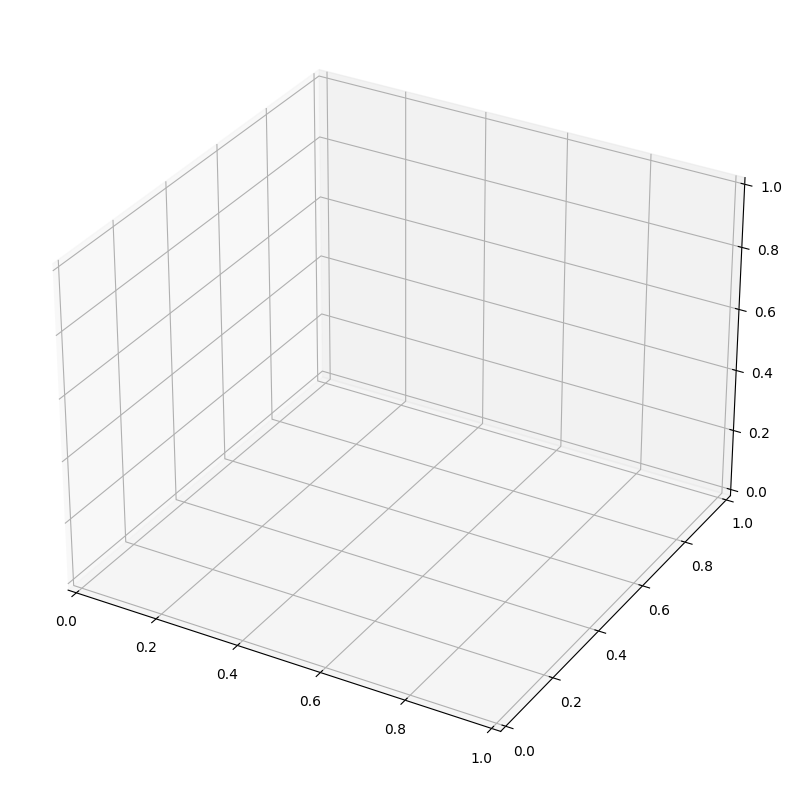

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation


# # Define the manipulator configuration (initial and final)
# initial_config = [np.pi/2, 0, 0, 0, 0, 0]
# final_config = [np.pi/4, np.pi/4, np.pi/4, np.pi/4, np.pi/4, np.pi/4]

# # Define the number of frames for animation
# num_frames = 50
# frames = np.linspace(0, 1, num_frames)

# # Initialize a figure and 3D axis
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Define the update function for animation
# def update(frame):
#     # Interpolate between initial and final configurations
#     # current_config = [ic + (fc - ic) * frame for ic, fc in zip(initial_config, final_config)]

#     # Calculate forward kinematics for the current configuration
#     fk_transform = solve_forward_kinematics(initial_config)

#     x_pos = 1/2
#     y_pos = 2/2
#     z_pos = 1

#     # Plot the points for the initial configuration
#     ax.scatter(x_pos, y_pos, z_pos, color='r')


#     # Clear previous plot
#     # ax.clear()

#     # Plot the manipulator
#     # Plot your frames here using plot_frame function
#     # Plot your manipulator using plot_wireframe or plot_surface function

#     ax.set_xlim3d([-1, 1])
#     ax.set_ylim3d([-1, 1])
#     ax.set_zlim3d([-1, 1])
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title('Manipulator Animation')

# # Create the animation
# ani = FuncAnimation(fig, update, frames=frames, blit=False, interval=50)

# # Show the animation
# plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


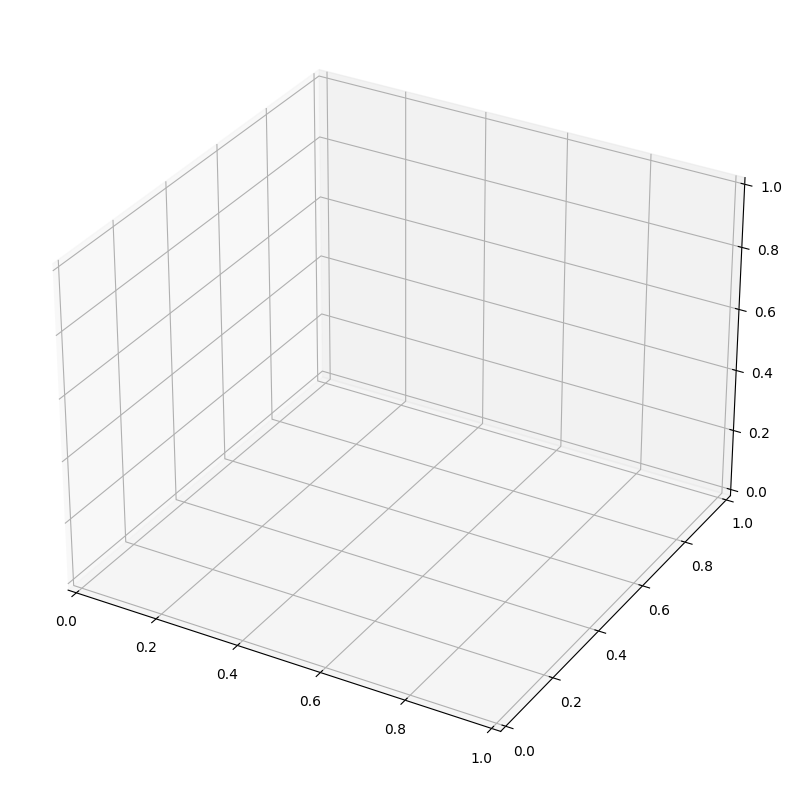

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation

# # Define the manipulator configuration (initial and final)
# initial_config = [np.pi/2, 0, 0, 0, 0, 0]
# final_config = [np.pi/4, np.pi/4, np.pi/4, np.pi/4, np.pi/4, np.pi/4]

# # Define the number of frames for animation
# num_frames = 50
# frames = np.linspace(0, 1, num_frames)

# # Initialize a figure and 3D axis
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Define the update function for animation
# def update(frame):
#     # Interpolate between initial and final configurations
#     current_config = [ic + (fc - ic) * frame for ic, fc in zip(initial_config, final_config)]

#     # Calculate forward kinematics for the current configuration
#     fk_transform = solve_forward_kinematics(current_config)

#     # Extract x, y, z coordinates from the forward kinematics transformation matrix
#     x_pos = fk_transform[0, 3]
#     y_pos = fk_transform[1, 3]
#     z_pos = fk_transform[2, 3]

#     # Plot the points for the current configuration
#     ax.scatter(x_pos, y_pos, z_pos, color='r')

#     # Set plot limits and labels
#     ax.set_xlim3d([-1, 1])
#     ax.set_ylim3d([-1, 1])
#     ax.set_zlim3d([-1, 1])
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title('Manipulator Animation')

# # Create the animation
# ani = FuncAnimation(fig, update, frames=frames, blit=False, interval=50)

# # Show the animation
# plt.show()


In [152]:
# Retrieve the transformations


def get_frames(q, manipulator=None):

  trans_matrices = []
  (theta1, theta2, theta3, theta4, theta5, theta6) = q
  l1, l2, l3, l4, l5, l6 = manipulator.l

  T_0 = np.identity(4)
  trans_matrices.append(T_0)
  T_01 = rotate_z(theta1) @ translate_z(l1) @ rotate_z(np.pi/2) @ rotate_x(np.pi/2)
  trans_matrices.append(T_01)

  T_12 = rotate_z(theta2) @ translate_x(l2)
  trans_matrices.append(T_12)

  T_23 = rotate_z(theta3) @ translate_x(l3) @ rotate_y(np.pi/2) @ rotate_z(np.pi/2)
  trans_matrices.append(T_23)

  T_34 = rotate_z(theta4) @ translate_z(l4) @ rotate_x(-np.pi/2) @ rotate_z(-np.pi)
  trans_matrices.append(T_34)

  T_45 = rotate_z(theta5) @ translate_y(l5) @ rotate_x(-np.pi/2)
  trans_matrices.append(T_45)

  T_56 = rotate_z(theta6) @ translate_z(l6)
  trans_matrices.append(T_56)

  transformation = np.identity(4)

  frames = []
  for i in range(len(trans_matrices)):
      transformation = transformation @ trans_matrices[i]
      validate_matrix(transformation)
      frames.append(transformation)

  return frames


get_frames(config1, manipulator)


[array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[0. , 0. , 1. , 0. ],
        [1. , 0. , 0. , 0. ],
        [0. , 1. , 0. , 0.3],
        [0. , 0. , 0. , 1. ]]),
 array([[0. , 0. , 1. , 0. ],
        [1. , 0. , 0. , 0.5],
        [0. , 1. , 0. , 0.3],
        [0. , 0. , 0. , 1. ]]),
 array([[ 0.        ,  1.        ,  0.        ,  0.        ],
        [-0.5       ,  0.        ,  0.8660254 ,  0.75980762],
        [ 0.8660254 ,  0.        ,  0.5       ,  0.45      ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[-0.38268343,  0.        ,  0.92387953,  0.        ],
        [ 0.46193977,  0.8660254 ,  0.19134172,  1.19282032],
        [-0.80010315,  0.5       , -0.33141357,  0.7       ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[-0.38268343, -0.92387953,  0.        ,  0.        ],
        [ 0.46193977, -0.19134172,  0.8660254 ,  1.45262794],
        [-0.80010315,  0.3

In [165]:
def extract_plot_points_for_each_link(transformation_matrices):
  xs, ys, zs = [],[],[]
  for trans_matrix in transformation_matrices:
    x,y,z = trans_matrix[0:3,3]
    xs.append(x)
    ys.append(y)
    zs.append(z)

  return xs,ys,zs

# config1 = [0, 0, 0, 0, 0, 0]
config1 = [np.pi/12, 0, np.pi/6, np.pi/12, 0, 0]

frames_for_each_link = get_frames(config1, manipulator)
print("points: ", extract_plot_points_for_each_link(frames_for_each_link))


# # solution1 = solve_forward_kinematics(config1)
# # solution2 = solve_forward_kinematics(config2)
# # solutions = [solution1, solution2]
# # extract_plot_points(solutions)


def extract_vectors_from_transf_matrix(transf_matrix):
    x,y,z = transf_matrix[0:3,3]
    p = [x,y,z]
    v1 = transf_matrix[0:3,0]
    v2 = transf_matrix[0:3,1]
    v3 = transf_matrix[0:3,2]

    return p, [v1,v2,v3]

# extract_vectors_from_transf_matrix(solution1)
def plot_arrow(ax, p,v,color):
  x,y,z = p
  u,v,w = v
  ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True,color=color)




def plot_frame(ax, trans):
  p,vs = extract_vectors_from_transf_matrix(trans)


  colors = ['r', 'g', 'b']

  for i in range(3):
    plot_arrow(ax, p , vs[i], colors[i])


points:  ([0.0, 0.0, -0.12940952255126034, -0.19665268296386434, -0.30872461698487097, -0.37596777739747494, -0.46562532461428024], [0.0, 0.0, 0.48296291314453416, 0.7339178042658765, 1.1521759561347804, 1.4031308472561228, 1.737737368751246], [0.0, 0.3, 0.3, 0.44999999999999996, 0.7, 0.85, 1.05])


xs [0.0, 0.0, -0.12940952255126034, -0.19665268296386434, -0.30872461698487097, -0.37596777739747494, -0.46562532461428024]
ys [0.0, 0.0, 0.48296291314453416, 0.7339178042658765, 1.1521759561347804, 1.4031308472561228, 1.737737368751246]
zs [0.0, 0.3, 0.3, 0.44999999999999996, 0.7, 0.85, 1.05]


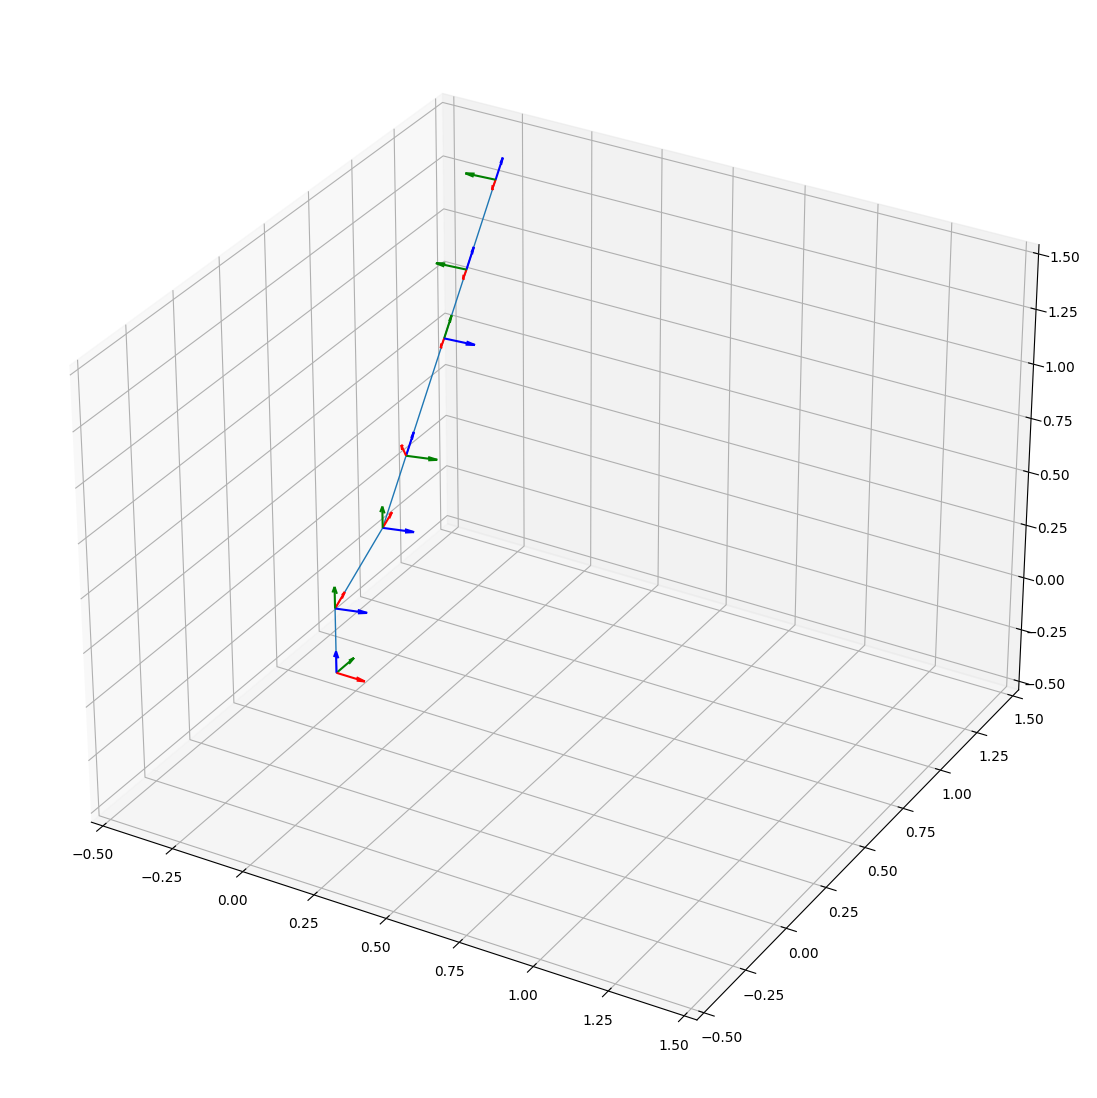

In [166]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# DH = make_dh([0,-1,1,0.5,1,pi/3])
fk = frames_for_each_link # serial_transform(DH)


# fig = plt.figure(figsize=(14,14))
# # ax = fig.gca(projection='3d')
# ax = Axes3D(fig)
Axes3D = Axes3D  # pycharm auto import
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')

for k in fk:
  plot_frame(ax,k)

xs,ys,zs = extract_plot_points_for_each_link(fk)
print("xs", xs)
print("ys", ys)
print("zs", zs)
ax.plot(xs,ys,zs, linewidth=1)


ax.set_xlim3d([-0.5, 1.5])
ax.set_ylim3d([-0.5, 1.5])
ax.set_zlim3d([-0.5, 1.5])


plt.show()

In [ ]:
print(solution1)

NameError: name 'solution1' is not defined

# Some tests

In [ ]:
len(manipulator.get_config())

2

In [ ]:
print("FK matrices:\n")

for i in range(len(manipulator.get_config())):
  # print(manipulator.get_config()[i])
  print(solve_forward_kinematics(manipulator, manipulator.get_config()[i]))

FK matrices:

[[-0.8660254   0.         -0.5        -2.15      ]
 [ 0.         -1.          0.          0.        ]
 [-0.5         0.          0.8660254   0.90621778]
 [ 0.          0.          0.          1.        ]]
[[ 0.27383384 -0.8080127   0.52166129  1.57759847]
 [ 0.71577558  0.53349365  0.45061053  1.01542737]
 [-0.64240202  0.25        0.72444437  1.49993138]
 [ 0.          0.          0.          1.        ]]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# def get_transformation_matrix(theta, d, a, alpha):
#     """
#     Calculate transformation matrix based on DH parameters
#     """
#     return np.array([
#         [np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],
#         [np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],
#         [0, np.sin(alpha), np.cos(alpha), d],
#         [0, 0, 0, 1]
#     ])

# def get_frames(config, manipulator):
#     """
#     Calculate transformation matrices for each joint based on configuration
#     """
#     frames = [np.eye(4)]
#     for i in range(len(config)):
#         theta, d, a, alpha = manipulator[i]
#         frame = get_transformation_matrix(theta + config[i], d, a, alpha)
#         frames.append(frames[-1] @ frame)
#     return frames

def extract_plot_points_for_each_link(transformation_matrices):
    """
    Extract plot points for each link from transformation matrices
    """
    xs, ys, zs = [], [], []
    for trans_matrix in transformation_matrices:
        x, y, z = trans_matrix[:3, 3]
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return xs, ys, zs

# Define DH parameters for each joint: [theta, d, a, alpha]
# Replace with your manipulator's DH parameters
manipulator = [
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 1, 0, np.pi/2],
    [0, 0, 1, 0],
    [0, 0, 1, 0]
]

# Sample configuration
config1 = [0, 0, 0, 0, 0, 0]

# Get transformation matrices for each joint
frames_for_each_link = get_frames(config1, manipulator)

# Extract plot points
xs, ys, zs = extract_plot_points_for_each_link(frames_for_each_link)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='r', marker='o')

# Plot reference frames
for frame in frames_for_each_link:
    origin = frame[:3, 3]
    x_axis = frame[:3, 0]
    y_axis = frame[:3, 1]
    z_axis = frame[:3, 2]
    ax.quiver(*origin, *x_axis, color='r')
    ax.quiver(*origin, *y_axis, color='g')
    ax.quiver(*origin, *z_axis, color='b')


ax.set_xlim3d([-0.5, 5])
ax.set_ylim3d([-0.5, 5])
ax.set_zlim3d([-0.5, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


AttributeError: 'list' object has no attribute 'l'

points:  ([0.0, 0.0, -0.6830127018922193, -0.8879165124598851, -1.2294228634059947, -1.4343266739736604, -1.7075317547305482], [0.0, 0.0, 0.6830127018922194, 0.8879165124598852, 1.229422863405995, 1.4343266739736609, 1.7075317547305486], [0.0, 0.3, 0.04118095489747925, -0.03646475863327697, -0.16587428118453734, -0.2435199947152935, -0.34704761275630175])


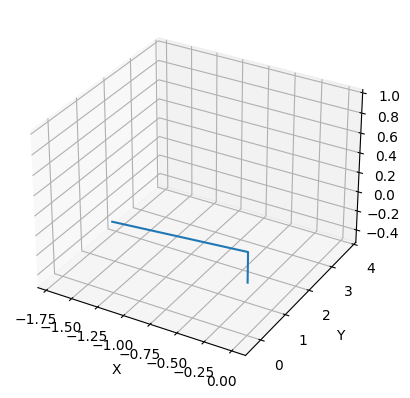

In [75]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')


def extract_plot_points_for_each_link(transformation_matrices):
    """
    Extract plot points for each link from transformation matrices
    """
    xs, ys, zs = [], [], []
    for trans_matrix in transformation_matrices:
        x, y, z = trans_matrix[:3, 3]
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return xs, ys, zs



def extract_vectors_from_transf_matrix(transf_matrix):
    x,y,z = transf_matrix[0:3,3]
    p = [x,y,z]
    v1 = transf_matrix[0:3,0]
    v2 = transf_matrix[0:3,1]
    v3 = transf_matrix[0:3,2]

    return p, [v1,v2,v3]

# extract_vectors_from_transf_matrix(solution1)
def plot_arrow(ax, p,v,color):
  x,y,z = p
  u,v,w = v
  ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True,color=color)




def plot_frame(ax, trans):
  p,vs = extract_vectors_from_transf_matrix(trans)


  colors = ['r', 'g', 'b']

  for i in range(3):
    plot_arrow(ax, p , vs[i], colors[i])

# for k in fk:
#   plot_frame(ax,k)


config1 = [np.pi/4, -np.pi/12, 0, 0, 0, 0]
frames_for_each_link = get_frames(config1, manipulator)
print("points: ", extract_plot_points_for_each_link(frames_for_each_link))
xs, ys, zs = extract_plot_points_for_each_link(frames_for_each_link)

ax.plot3D(xs, ys, zs)

# ax.set_xlim3d([-0.5, 5])
ax.set_ylim3d([-0.5, 4])
ax.set_zlim3d([-0.5, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [143]:
# Retrieve the transformations


def get_frames(q, manipulator=None):

  trans_matrices = []
  (theta1, theta2, theta3, theta4, theta5, theta6) = q
  l1, l2, l3, l4, l5, l6 = manipulator.l

  T_0 = np.identity(4)
  trans_matrices.append(T_0)
  T_01 = rotate_z(theta1) @ translate_z(l1) @ rotate_z(np.pi/2) @ rotate_x(np.pi/2)
  trans_matrices.append(T_01)

  T_12 = rotate_z(theta2) @ translate_x(l2)
  trans_matrices.append(T_12)

  T_23 = rotate_z(theta3) @ translate_x(l3) @ rotate_y(np.pi/2) @ rotate_z(np.pi/2)
  trans_matrices.append(T_23)

  T_34 = rotate_z(theta4) @ translate_z(l4) @ rotate_x(-np.pi/2) @ rotate_z(-np.pi)
  trans_matrices.append(T_34)

  T_45 = rotate_z(theta5) @ translate_y(l5) @ rotate_x(-np.pi/2)
  trans_matrices.append(T_45)

  T_56 = rotate_z(theta6) @ translate_z(l6)
  trans_matrices.append(T_56)

  transformation = np.identity(4)

  frames = []
  for i in range(len(trans_matrices)):
      transformation = transformation @ trans_matrices[i]
      validate_matrix(transformation)
      frames.append(transformation)

  return frames


get_frames(config1, manipulator)


[array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[-0.25881905,  0.        ,  0.96592583,  0.        ],
        [ 0.96592583,  0.        ,  0.25881905,  0.        ],
        [ 0.        ,  1.        ,  0.        ,  0.3       ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[-0.1830127 , -0.1830127 ,  0.96592583, -0.09150635],
        [ 0.6830127 ,  0.6830127 ,  0.25881905,  0.34150635],
        [-0.70710678,  0.70710678,  0.        , -0.05355339],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[-0.1830127 ,  0.96592583, -0.1830127 , -0.14641016],
        [ 0.6830127 ,  0.25881905,  0.6830127 ,  0.54641016],
        [ 0.70710678,  0.        , -0.70710678, -0.26568542],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.1830127 , -0.1830127 ,  0.96592583, -0.23791651],
        [-0.6830127 ,  0.6830127 ,  0.25881905,  0.88791651],
        [-0.70710678

xs [0.0, 0.0, 0.18482190530719309, 0.2957150484915089, 0.48053695379870204, 0.5914300969830179, 0.7392876212287723]
ys [0.0, 0.0, 0.4461995504162614, 0.7139192806660182, 1.1601188310822796, 1.4278385613320363, 1.7847982016650454]
zs [0.0, 0.3, 0.42940952255126036, 0.5070552360820166, 0.636464758633277, 0.7141104721640332, 0.8176380902050415]


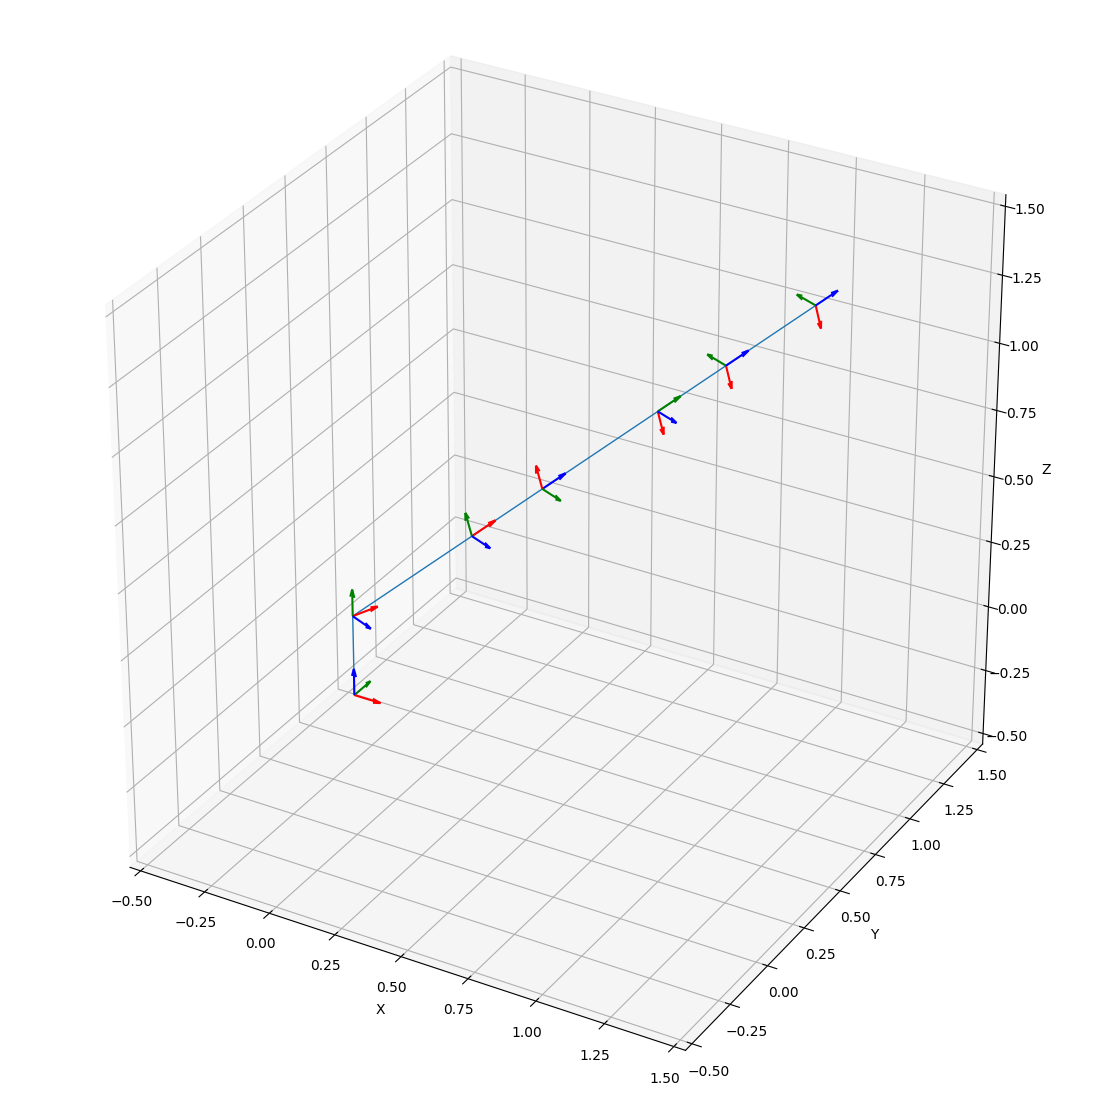

In [176]:
# WORKS!

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



def extract_plot_points_for_each_link(transformation_matrices):
    """
    Extract plot points for each link from transformation matrices
    """
    xs, ys, zs = [], [], []
    for trans_matrix in transformation_matrices:
        x, y, z = trans_matrix[:3, 3]
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return xs, ys, zs

def extract_vectors_from_transf_matrix(transf_matrix):
    x,y,z = transf_matrix[0:3,3]
    p = [x,y,z]
    v1 = transf_matrix[0:3,0]
    v2 = transf_matrix[0:3,1]
    v3 = transf_matrix[0:3,2]

    return p, [v1,v2,v3]

def plot_arrow(ax, p, v, color):
    x,y,z = p
    u,v,w = v
    # ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True, color=color)
    ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True, color=color)


# def plot_arrow(ax, p, v, color, scale=1.0):
#     x, y, z = p
#     u, v, w = v
#     ax.quiver(x, y, z, u*scale, v*scale, w*scale, normalize=False, color=color)


def plot_frame(ax, trans):
    p,vs = extract_vectors_from_transf_matrix(trans)
    colors = ['r', 'g', 'b']
    for i in range(3):
      # plot_arrow(ax, p, vs[i], colors[i], scale=0.1)  # Adjust scale as needed
        plot_arrow(ax, p , vs[i], colors[i])


# Define DH parameters for each joint: [theta, d, a, alpha]
# Replace with your manipulator's DH parameters


# Sample configuration
config1 = [-np.pi/8, np.pi/12, 0, 0, 0, 0]

# config1 = [np.pi/12, -np.pi/4, 0, 0, 0, 0]
# config1 = [-np.pi/6, -np.pi/12, np.pi/6, np.pi/8, np.pi/12, np.pi/6]
# config1 = [-np.pi/6, 0, np.pi/6, np.pi/8, 0, np.pi/6]
# config1 = [np.pi/12, 0, np.pi/6, np.pi/8, 0, np.pi/6]


l = [0.3, 0.5, 0.3, 0.5, 0.3, 0.4]
manipulator = Manipulator(l)
# Get transformation matrices for each joint
frames_for_each_link = get_frames(config1, manipulator)

# Extract plot points
xs, ys, zs = extract_plot_points_for_each_link(frames_for_each_link)

# Plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

Axes3D = Axes3D  # pycharm auto import
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')


# Plot points
# ax.plot3D(xs, ys, zs)

# Plot reference frames
for frame in frames_for_each_link:
    plot_frame(ax, frame)


# for k in fk:
#   plot_frame(ax,k)

xs, ys, zs = extract_plot_points_for_each_link(frames_for_each_link)

# xs,ys,zs = extract_plot_points_for_each_link(fk)
print("xs", xs)
print("ys", ys)
print("zs", zs)
ax.plot(xs,ys,zs, linewidth=1)


ax.set_xlim3d([-0.5, 1.5])
ax.set_ylim3d([-0.5, 1.5])
ax.set_zlim3d([-0.5, 1.5])



# ax.set_xlim3d([-1,1])
# ax.set_ylim3d([-1,1])
# ax.set_zlim3d([-1,1])
# ax.set_xlim3d([-0.5,1])
# ax.set_ylim3d([-0.5,1])
# ax.set_zlim3d([-0.5,1])


# ax.set_ylim3d([-0.5, 4])
# ax.set_ylim3d([-0.5, 4])
# ax.set_zlim3d([-0.5, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,1])  # Set aspect ratio to equal

plt.show()
